<a href="https://colab.research.google.com/github/pranavwarrier/Stroke-Analysis/blob/main/Stroke_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction and Anaysis Using Machine Learning

## Introduction

In this notebook, we will describe step-by-step procedure for building a machine learning (ML) model for stroke prediction and analysing which features are most useful for the prediction. The packages used in this notebook are as follows:
- Python
- Pandas
- Numpy 
- Matplotlib
- Scikit-Learn 
- Imbalanced-Learn 

## Data Exploration and Visualisation

We will use the [Kaggle stroke dataset] comprising 12 columns (variables) as listed in the following table.

| No  | Variable          | Definition                                           |        
| --- | ---               | ---                                                  |
| 1   | id                | Patient ID                                           |
| 2   | gender            | Gender of patient                                    |
| 3   | age               | Age of patient                                       |
| 4   | hypertension      | 0: no hypertension, 1: suffering from hypertension   |
| 5   | heart_disease     | 0: no heart disease, 1: suffering from heart disease |
| 6   | ever_married      | Yes/No                                               |
| 7   | work_type         | Type of occupation                                   |
| 8   | Residence_type    | Area type of residence (urban/rural)                 |
| 9   | avg_glucose_level | Average glucose level (measured after meal)          |
| 10  | bmi               | Body mass index                                      |
| 11  | smoking_status    | Patient's smoking status                             |
| 12  | stroke            | 0: no stroke, 1: suffered stroke                     |

### Importing all the relevant packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

### Opening the dataset


In [ ]:
# import package
# open dataset
data = pd.read_csv('https://raw.githubusercontent.com/pranavwarrier/csv/main/healthcare-dataset-stroke-data.csv')
with pd.option_context('expand_frame_repr', False):
    print(data.head())
print("Data shape: {}".format(data.shape))

      id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0   9046    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1  51676  Female  61.0             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2  31112    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3  60182  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4   1665  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
Data shape: (5110, 12)


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [ ]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


### Handling Missing Values

In [ ]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None 
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

clean_data = data[data['smoking_status'].notnull()]
# validate there's no more missing values
#miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))

print("Shape of data without missing values: {}".format(clean_data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable 'bmi'		: 3.9334637964774952
Shape of data without missing values: (5110, 12)


### Changing Category to Numerical Values

Since some variables are categorical, we have to convert them into numerical variables.

In [ ]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [ ]:
clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
0   9046       1  67.0             0              1             1          2               1             228.69  36.600000               1       1
1  51676       0  61.0             0              0             1          3               0             202.21  28.893237               2       1
2  31112       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
3  60182       0  49.0             0              0             1          2               1             171.23  34.400000               3       1
4   1665       0  79.0             1              0             1          3               0             174.12  24.000000               2       1


### Inter-feature Correlation



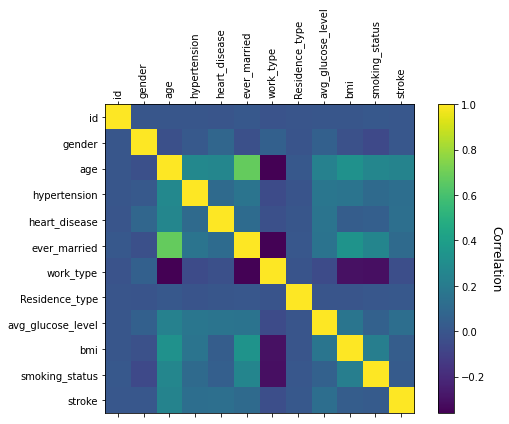

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

### Histogram of Features

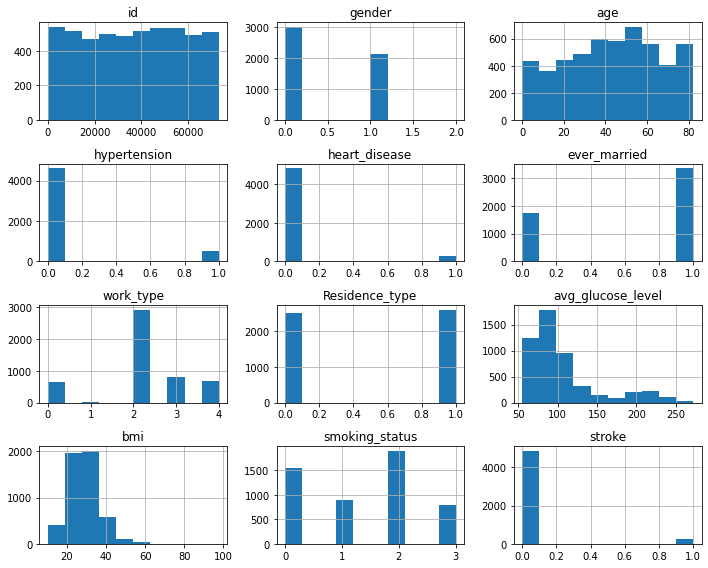

In [ ]:
fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

### Class (Target) Distribution
Now, let's take a look at the distribution of class (target). If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

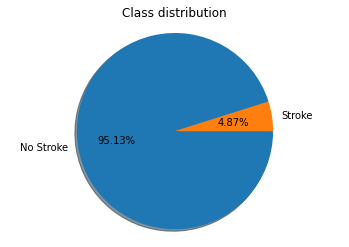

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [ ]:
class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

## Data Preprocessing

In [ ]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_sample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 11)
Shape of y: (9722,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


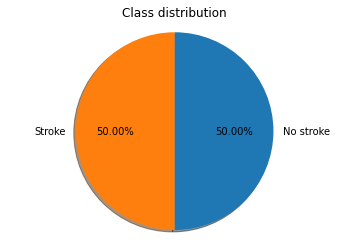

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [ ]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

### Data Splitting

In [ ]:
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3888 | # class 1: 3888
[valid] # class 0: 486 | # class 1: 487
[test]  # class 0: 487 | # class 1: 486


### Data Normalisation

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

## ML Model Training and Evaluation
We will implement and benchmark the performance of the following ML algorithms:
1. Singular Vector Machine (SVM)
2. Gaussian Naive Bayes (GNB)
3. Logistic Regression (LR)
4. Decision Tree (DT)
5. Random Forest (RF)


### Performance Metrics

The peformance will be evaluated based on two different groups of metrics:
1. Sensitivity, specificity, and area under the curve (AUC)
2. Precision, recall, and F1 score

In [ ]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

### Singular Vector Machine (SVM)

In [ ]:
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 6.40 seconds


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       487
           1       0.94      0.91      0.92       486

    accuracy                           0.93       973
   macro avg       0.93      0.93      0.93       973
weighted avg       0.93      0.93      0.93       973

Confusion matrix for SVM: 
[[458  29]
 [ 43 443]]
Accuracy score for SVM: 0.93
Precision score for SVM: 0.94
Recall score for SVM: 0.91
F1 score for SVM: 0.92
Sensitivity score for SVM: 0.91
Specitivity score for SVM: 0.94
AUC score for SVM: 0.98


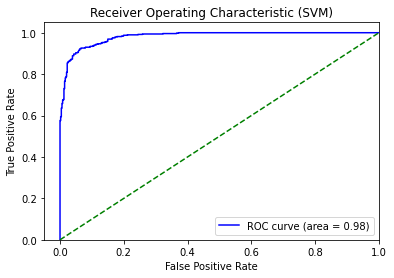

In [ ]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

### Gaussian Naive Bayes (GNB)

In [ ]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Finished training within 0.01 seconds


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       487
           1       0.75      0.84      0.79       486

    accuracy                           0.78       973
   macro avg       0.79      0.78      0.78       973
weighted avg       0.79      0.78      0.78       973

Confusion matrix for GNB: 
[[355 132]
 [ 80 406]]
Accuracy score for GNB: 0.78
Precision score for GNB: 0.75
Recall score for GNB: 0.84
F1 score for GNB: 0.79
Sensitivity score for GNB: 0.84
Specitivity score for GNB: 0.73
AUC score for GNB: 0.85


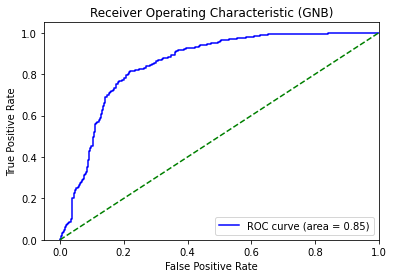

In [ ]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

### Logistic Regression (LR)

In [ ]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 0.03 seconds


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       487
           1       0.77      0.81      0.79       486

    accuracy                           0.78       973
   macro avg       0.78      0.78      0.78       973
weighted avg       0.78      0.78      0.78       973

Confusion matrix for LR: 
[[370 117]
 [ 93 393]]
Accuracy score for LR: 0.78
Precision score for LR: 0.77
Recall score for LR: 0.81
F1 score for LR: 0.79
Sensitivity score for LR: 0.81
Specitivity score for LR: 0.76
AUC score for LR: 0.85


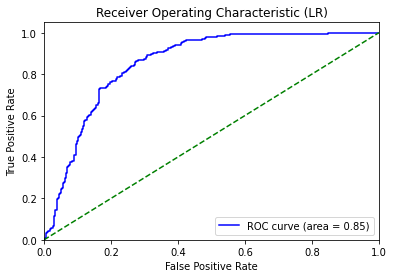

In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot( fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

### Decision Tree (DT)

In [ ]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.04 seconds


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       487
           1       0.96      0.96      0.96       486

    accuracy                           0.96       973
   macro avg       0.96      0.96      0.96       973
weighted avg       0.96      0.96      0.96       973

Confusion matrix for DT: 
[[467  20]
 [ 20 466]]
Accuracy score for DT: 0.96
Precision score for DT: 0.96
Recall score for DT: 0.96
F1 score for DT: 0.96
Sensitivity score for DT: 0.96
Specitivity score for DT: 0.96
AUC score for DT: 0.96


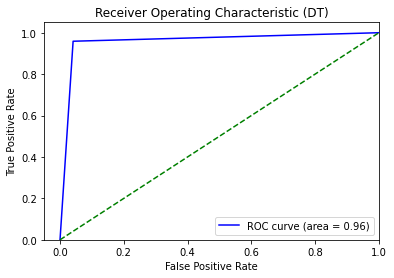

In [ ]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

### Random Forest (RF)

In [ ]:
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 1.00 seconds


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       487
           1       1.00      0.96      0.98       486

    accuracy                           0.98       973
   macro avg       0.98      0.98      0.98       973
weighted avg       0.98      0.98      0.98       973

Confusion matrix for RF: 
[[486   1]
 [ 19 467]]
Accuracy score for RF: 0.98
Precision score for RF: 1.00
Recall score for RF: 0.96
F1 score for RF: 0.98
Sensitivity score for RF: 0.96
Specitivity score for RF: 1.00
AUC score for RF: 1.00


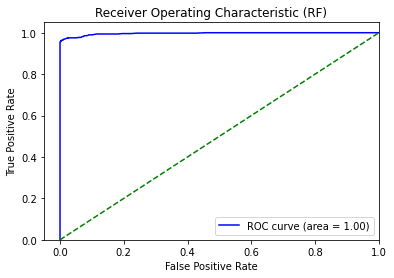

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

## Performance Benchmark Across Models

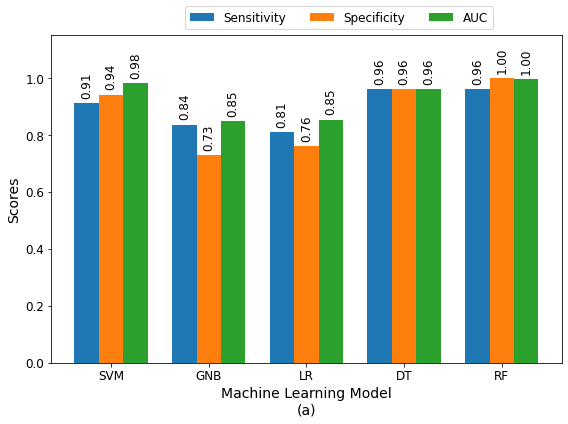

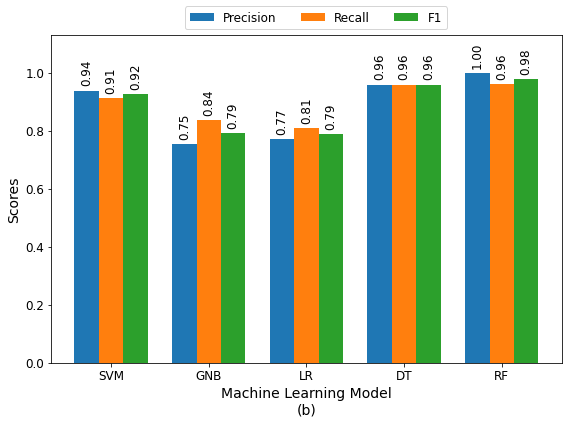

In [ ]:
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

## Selecting Most Important Features

To evaluate the most important features, we will use feature importance score which can be calculated using two different methods as follows:
1. Tree based feature importance. This is calculated during the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees indicates higher relative importance. This can be access by using feature_importances_ attribute within the model.
2. Permutation based feature importance. First, we compute the baseline performance of the original trained model (without permutation) using the testing set; Second, for each feature, we permute the data in that feature, compute and record the performance based on the permuted data; lastly, compute the feature importance as the difference between the baseline performance and the performance based on the permuted data.

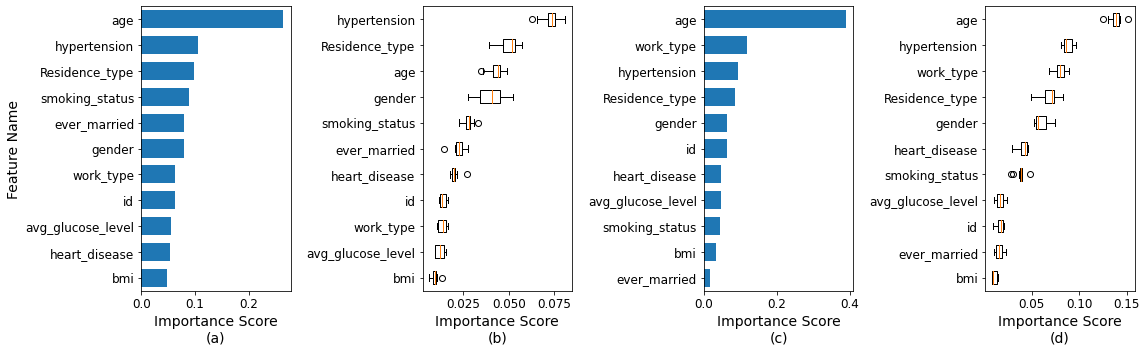

In [ ]:
# feature importance from random forest
feature_names = clean_data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test_std, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(a)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from SVM
dtree_perm_imp = permutation_importance(dtree_model, X_test_std, y_test, n_repeats=10, random_state=42)
dtree_perm_sort_idx = dtree_perm_imp.importances_mean.argsort()

dtree_tree_sort_idx = np.argsort(dtree_model.feature_importances_)
dtree_indices = np.arange(0, len(dtree_model.feature_importances_)) + 0.5

ax3.barh(dtree_indices,dtree_model.feature_importances_[dtree_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[dtree_tree_sort_idx])
ax3.set_yticks(dtree_indices)
ax3.set_ylim((0, len(dtree_model.feature_importances_)))
ax4.boxplot(dtree_perm_imp.importances[dtree_perm_sort_idx].T,vert=False,labels=feature_names[dtree_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()


## Summary

In summary, two highest stroke prediction performance was achieved by random forest; three most important features (in descending order) for stroke prediction were 'age', 'avg_glucose_level', and 'bmi'.